<a href="https://colab.research.google.com/github/ihwani-math/stocks_prediction/blob/main/LSTM_NFLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Author: Ivan L. Ihwani
#Last Update: 9/30/2024


#import the libraries
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get thr stock quote
df = yf.download('NFLX', start='2016-05-01', end=None)
#show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,90.410004,93.220001,89.889999,93.110001,93.110001,12547000
2016-05-03,92.080002,93.250000,91.300003,91.540001,91.540001,10593900
2016-05-04,91.000000,92.160004,90.349998,90.790001,90.790001,7394700
2016-05-05,90.910004,92.080002,89.250000,89.370003,89.370003,10368500
2016-05-06,88.830002,90.879997,88.110001,90.839996,90.839996,10433900
...,...,...,...,...,...,...
2024-09-23,702.390015,712.250000,699.159973,705.369995,705.369995,3224300
2024-09-24,706.630005,722.440002,704.450012,722.260010,722.260010,3565700
2024-09-25,721.000000,725.119995,716.210022,721.559998,721.559998,2259800


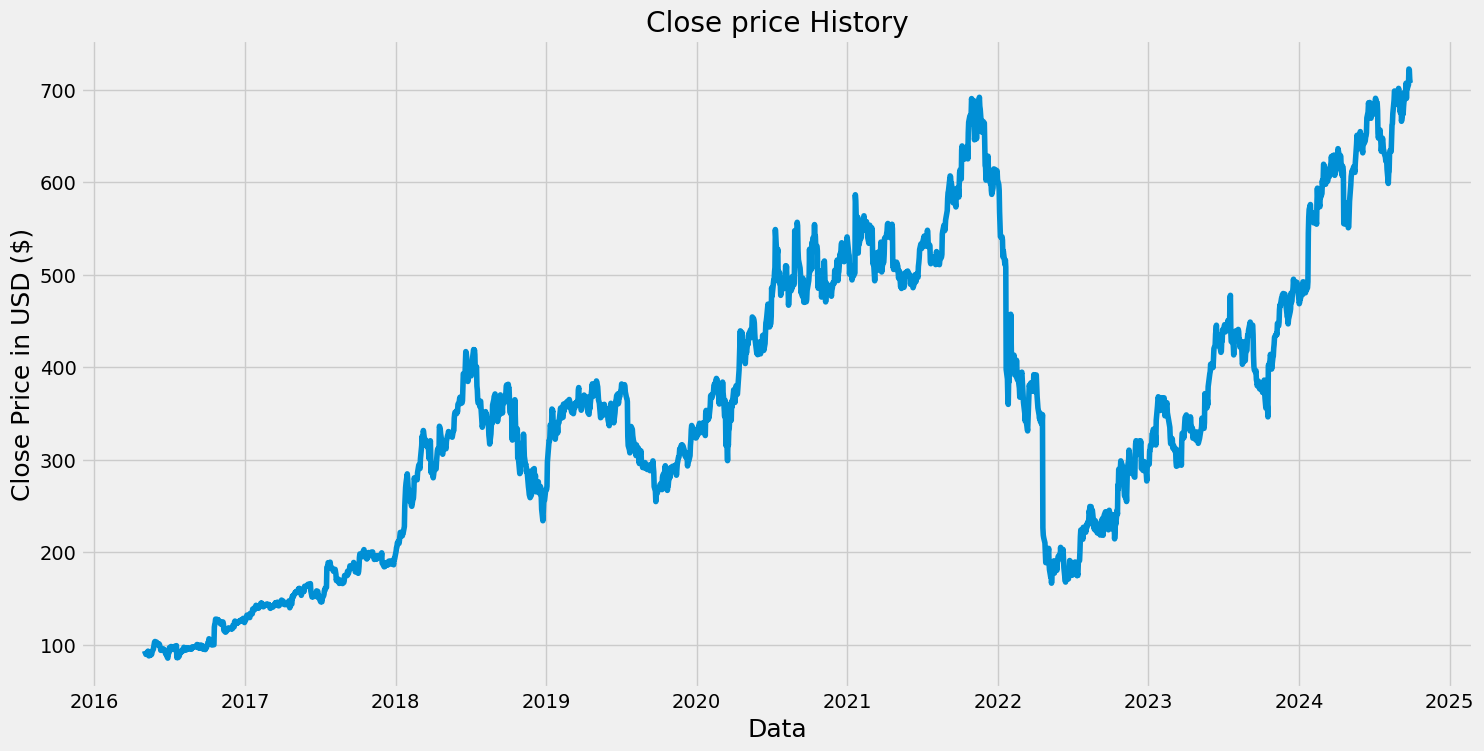

In [2]:
# Get the number of rows and columns in the data set
df.shape
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [3]:
# Create a new dataframe with only the 'Close' column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1694

In [5]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01221484],
       [0.00974989],
       [0.00857237],
       ...,
       [0.99890096],
       [0.98299654],
       [0.97659078]])

In [6]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01221484, 0.00974989, 0.00857237, 0.00634293, 0.00865086,
       0.00817986, 0.01186943, 0.00736344, 0.00378377, 0.00400357,
       0.00595042, 0.0051811 , 0.00811706, 0.00662553, 0.01124142,
       0.01500949, 0.01971959, 0.02334636, 0.02744414, 0.02821346,
       0.02706733, 0.02540311, 0.02499489, 0.02238864, 0.02419417,
       0.02285965, 0.01967249, 0.01846356, 0.01321966, 0.01337666,
       0.01380058, 0.01406748, 0.01587302, 0.01431868, 0.01329817,
       0.00888637, 0.00734775, 0.0099383 , 0.0048828 , 0.        ,
       0.00414488, 0.00899627, 0.00965569, 0.01780415, 0.019751  ,
       0.01455418, 0.0153392 , 0.01841646, 0.01466409, 0.01670513,
       0.01742734, 0.01992369, 0.0205046 , 0.02116401, 0.00080071,
       0.00405068, 0.00103621, 0.00087921, 0.00365818, 0.00954579])]
[0.010534908076056532]

[array([0.01221484, 0.00974989, 0.00857237, 0.00634293, 0.00865086,
       0.00817986, 0.01186943, 0.00736344, 0.00378377, 0.00400357,
       0.00595042, 0.0051811 , 0.0

In [7]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train =np.array(x_train),np.array(y_train)
#Reshape the data
x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1634, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1634/1634 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - loss: 0.0090


In [18]:
# Create the testing dataset
# Create a new array containing scaled values from index (training_data_len - 60) to 2003
test_data = scaled_data[training_data_len - 60:2003]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # y_test should come from original dataset

# Create x_test sequences
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # Corrected the array indexing

# Convert x_test to numpy array
x_test = np.array(x_test)

In [21]:
# Ensure that y_test and predictions have the same length
min_length = min(len(predictions), len(y_test))

# Slice y_test to the same length as predictions
y_test = y_test[:min_length]

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions[:min_length] - y_test) ** 2))

rmse

40.58410783269582

<ipython-input-24-3d2adfde7c49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


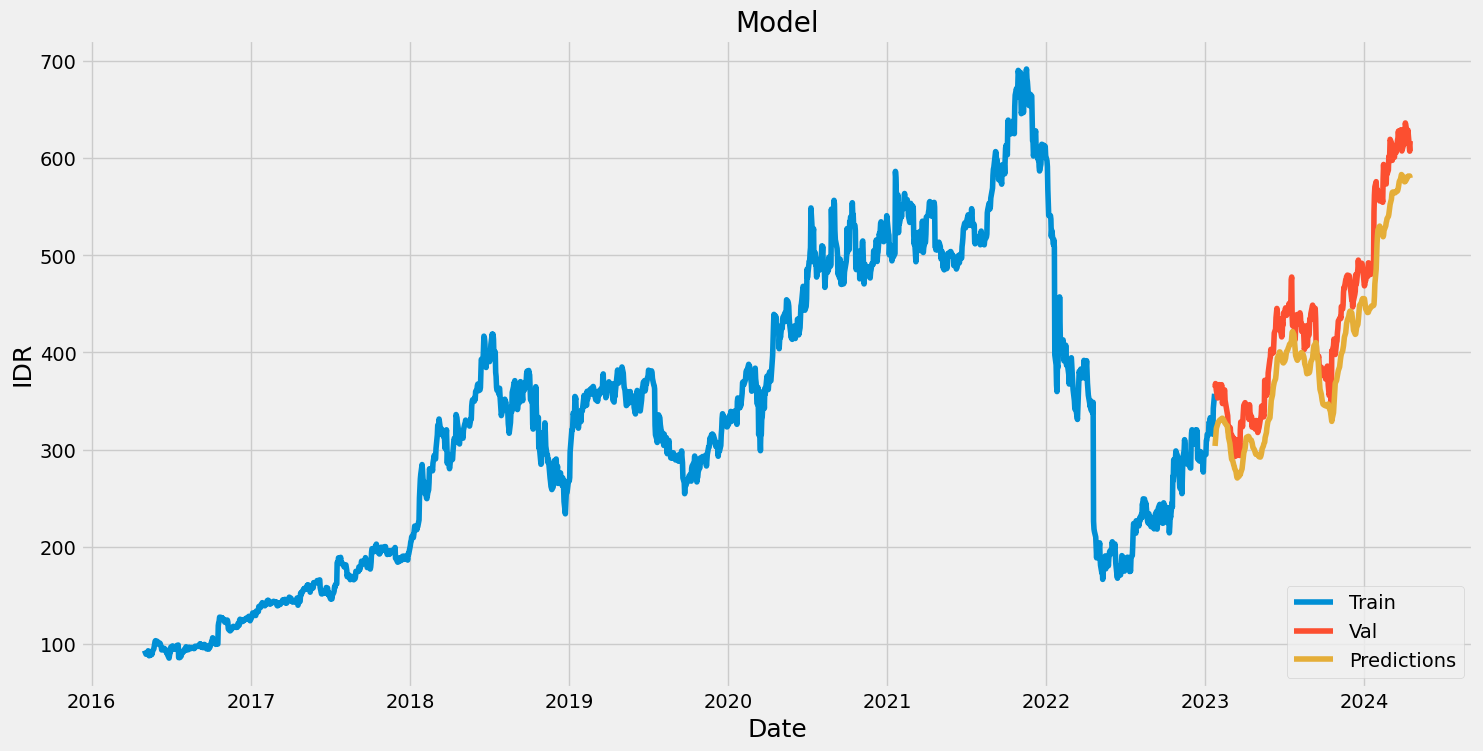

In [24]:
# Truncate the 'valid' DataFrame to match the length of 'predictions'
valid = valid[:len(predictions)]

# Now you can safely assign the predictions to the 'valid' DataFrame
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [25]:
valid


,Close,Predictions
Date,,
2023-01-24,363.829987,303.698792
2023-01-25,367.959991,309.481781
2023-01-26,364.869995,316.052765
2023-01-27,360.769989,321.897552
2023-01-30,353.109985,326.137329
...,...,...
2024-04-10,618.580017,581.071472
2024-04-11,628.780029,580.773743
2024-04-12,622.830017,581.408142
